# STEP #0: PROBLEM STATEMENT  

- CIFAR-10 is a dataset that consists of several images divided into the following 10 classes: 
    - Airplanes
    - Cars 
    - Birds
    - Cats
    - Deer
    - Dogs
    - Frogs
    - Horses
    - Ships
    - Trucks

- The dataset stands for the Canadian Institute For Advanced Research (CIFAR)
- CIFAR-10 is widely used for machine learning and computer vision applications. 
- The dataset consists of 60,000 32x32 color images and 6,000 images of each class.
- Images have low resolution (32x32). 
- Data Source: https://www.cs.toronto.edu/~kriz/cifar.html



# STEP #1: IMPORT LIBRARIES

In [1]:
!pip install tensorflow-gpu==2.0.0.alpha0

import numpy as np
import datetime
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random 
import keras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement tensorflow-gpu==2.0.0.alpha0 (from versions: 2.2.0, 2.2.1, 2.2.2, 2.2.3, 2.3.0, 2.3.1, 2.3.2, 2.3.3, 2.3.4, 2.4.0, 2.4.1, 2.4.2, 2.4.3, 2.4.4, 2.5.0, 2.5.1, 2.5.2, 2.5.3, 2.6.0, 2.6.1, 2.6.2, 2.6.3, 2.6.4, 2.6.5, 2.7.0rc0, 2.7.0rc1, 2.7.0, 2.7.1, 2.7.2, 2.7.3, 2.7.4, 2.8.0rc0, 2.8.0rc1, 2.8.0, 2.8.1, 2.8.2, 2.8.3, 2.8.4, 2.9.0rc0, 2.9.0rc1, 2.9.0rc2, 2.9.0, 2.9.1, 2.9.2, 2.9.3, 2.10.0rc0, 2.10.0rc1, 2.10.0rc2, 2.10.0rc3, 2.10.0, 2.10.1, 2.11.0rc0, 2.11.0rc1, 2.11.0rc2, 2.11.0, 2.12.0)
ERROR: No matching distribution found for tensorflow-gpu==2.0.0.alpha0


# STEP #2: LOAD DATASET

In [2]:
(X_train, y_train) , (X_test, y_test) = tf.keras.datasets.cifar10.load_data()

In [3]:
X_train.shape

(50000, 32, 32, 3)

# STEP #3: DATA VISUALIZATION

array([3], dtype=uint8)

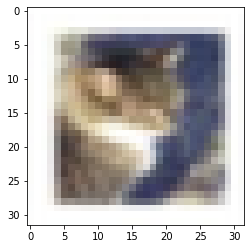

In [4]:
i = random.randint(0, 50000)
plt.imshow(X_train[i])
y_train[i]

# STEP#4: DATA PREPARATION

In [5]:
X_train

array([[[[ 59,  62,  63],
         [ 43,  46,  45],
         [ 50,  48,  43],
         ...,
         [158, 132, 108],
         [152, 125, 102],
         [148, 124, 103]],

        [[ 16,  20,  20],
         [  0,   0,   0],
         [ 18,   8,   0],
         ...,
         [123,  88,  55],
         [119,  83,  50],
         [122,  87,  57]],

        [[ 25,  24,  21],
         [ 16,   7,   0],
         [ 49,  27,   8],
         ...,
         [118,  84,  50],
         [120,  84,  50],
         [109,  73,  42]],

        ...,

        [[208, 170,  96],
         [201, 153,  34],
         [198, 161,  26],
         ...,
         [160, 133,  70],
         [ 56,  31,   7],
         [ 53,  34,  20]],

        [[180, 139,  96],
         [173, 123,  42],
         [186, 144,  30],
         ...,
         [184, 148,  94],
         [ 97,  62,  34],
         [ 83,  53,  34]],

        [[177, 144, 116],
         [168, 129,  94],
         [179, 142,  87],
         ...,
         [216, 184, 140],
        

In [6]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [7]:
X_train = X_train.astype('float32')
y_train = y_train.astype('float32')

In [8]:
category_num = len(list(np.unique(np.concatenate((y_train, y_test), axis=0))))

In [9]:
y_train = keras.utils.to_categorical(y_train, category_num)
y_test = keras.utils.to_categorical(y_test, category_num)

In [10]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [11]:
y_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]], dtype=float32)

In [12]:
X_train = X_train/255
X_test = X_test/255

In [13]:
X_train.shape

(50000, 32, 32, 3)

# STEP #5: TRAIN THE MODEL

In [14]:
from tensorflow.keras import datasets, layers, models

model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D(2, 2))
model.add(layers.Dropout(0.2))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D(2, 2))
model.add(layers.Dropout(0.2))
model.add(layers.Flatten())
model.add(layers.Dense(1024, activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(1024, activation='relu'))
model.add(layers.Dense(category_num, activation='softmax'))

In [15]:
model.compile(optimizer = tf.keras.optimizers.RMSprop(0.0001, decay = 1e-6), loss ='categorical_crossentropy', metrics =['accuracy'])

In [16]:
history = model.fit(X_train, y_train, batch_size=128, epochs=100)

Epoch 1/100
391/391 [==============================] - 8s 14ms/step - loss: 1.8960 - accuracy: 0.3090
Epoch 2/100
391/391 [==============================] - 6s 14ms/step - loss: 1.6192 - accuracy: 0.4165
Epoch 3/100
391/391 [==============================] - 6s 14ms/step - loss: 1.4809 - accuracy: 0.4666
Epoch 4/100
391/391 [==============================] - 5s 13ms/step - loss: 1.3767 - accuracy: 0.5052
Epoch 5/100
391/391 [==============================] - 4s 11ms/step - loss: 1.3011 - accuracy: 0.5356
Epoch 6/100
391/391 [==============================] - 4s 11ms/step - loss: 1.2349 - accuracy: 0.5636
Epoch 7/100
391/391 [==============================] - 4s 11ms/step - loss: 1.1754 - accuracy: 0.5837
Epoch 8/100
391/391 [==============================] - 4s 11ms/step - loss: 1.1225 - accuracy: 0.6045
Epoch 9/100
391/391 [==============================] - 4s 11ms/step - loss: 1.0783 - accuracy: 0.6214
Epoch 10/100
391/391 [==============================] - 4s 11ms/step - loss: 1.036

# STEP #6: EVALUATE THE MODEL

In [17]:
score = model.evaluate(X_test, y_test)
print('Test Accuracy: {}'.format(score[1]))

313/313 [==============================] - 1s 3ms/step - loss: 1.1142 - accuracy: 0.7757
Test Accuracy: 0.7756999731063843


In [18]:
predicted_classes = model.predict(X_test).argmax(axis=-1)

313/313 [==============================] - 1s 2ms/step


In [19]:
y_test = y_test.argmax(1)

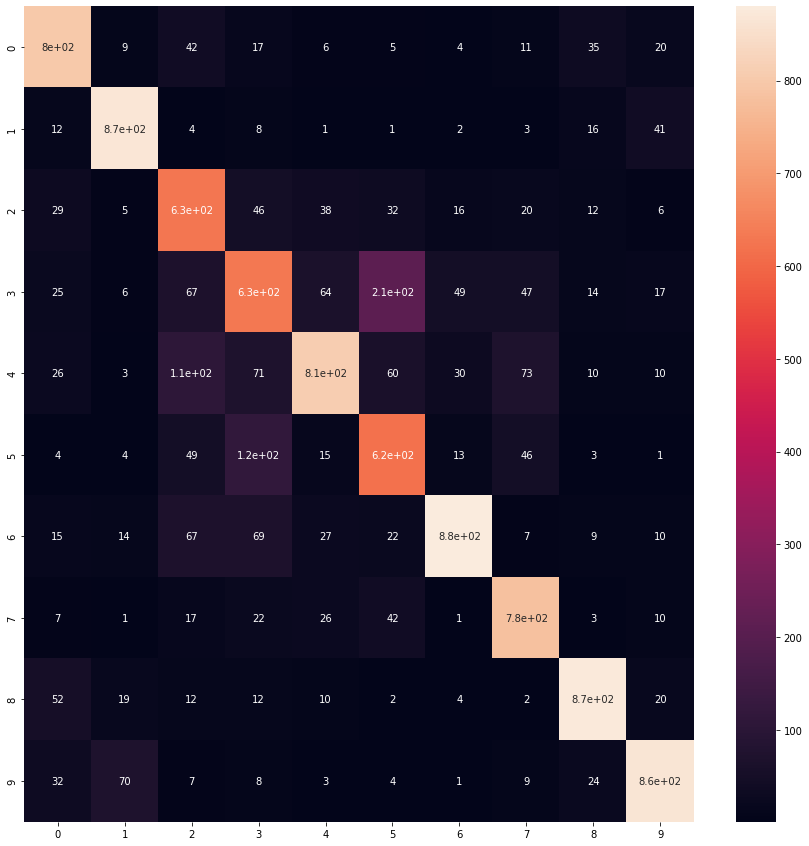

In [20]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(predicted_classes, y_test)
plt.figure(figsize=(15, 15))
sns.heatmap(cm, annot = True)

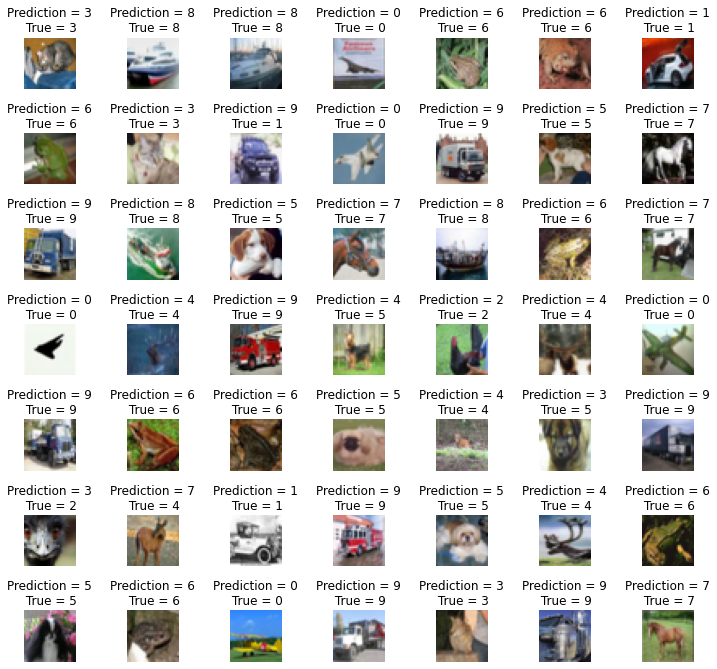

In [21]:
L = 7
W = 7

fig, axes = plt.subplots(L, W, figsize=(12, 12))
axes = axes.ravel()

for i in np.arange(0, L*W):
    axes[i].imshow(X_test[i])
    axes[i].set_title('Prediction = {}\n True = {}'.format(predicted_classes[i], y_test[i]))
    axes[i].axis('off')

plt.subplots_adjust(wspace = 1)    